In [1]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

Part 1

In [3]:
# Read `myopia.csv` into a Pandas DataFrame.

file_path = ("Starter_Code/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# Remove the "MYOPIC" column from the dataset.
myopia_data = df_myopia.drop(['MYOPIC'], axis=1)
# myopia_data.head()

In [5]:
#Standardize your dataset into smaller values.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_data)

Part 2

In [6]:
# Perform dimensionality reduction with PCA at n_components=0.90
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)

In [7]:
# pca_transformed_data variance to detect the importance of components. Principle component 1 and 2 
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [8]:
# Run t-SNE
tsne = TSNE(learning_rate=50)
transformed_features = tsne.fit_transform(pca_transformed_data)

C:\Users\nicke\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [9]:
# Check that dimensions have been reduced to two
transformed_features.shape

(618, 2)

In [10]:
myopia_data["X"] = transformed_features[:,0]
myopia_data["y"] = transformed_features[:,1]
myopia_data["Myopic"] = df_myopia["MYOPIC"]
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,X,y,Myopic
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,5.614450,-12.234124,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,-9.981026,-15.093422,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-1.670908,21.397085,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,6.422686,1.046149,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,-9.773068,-6.518426,0


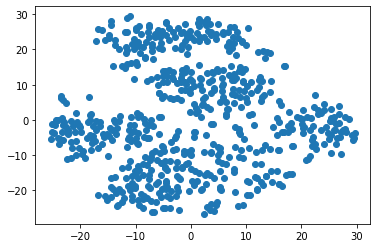

In [11]:
plt.scatter(myopia_data["X"], myopia_data["y"])
plt.show()

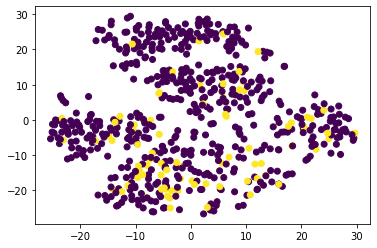

In [12]:
plt.scatter(myopia_data["X"], myopia_data["y"], c=myopia_data["Myopic"])
plt.show()

In [13]:
labels = myopia_data["Myopic"]
labels.value_counts()

0    537
1     81
Name: Myopic, dtype: int64

Part 3

In [14]:
df_myopia_pca = pd.DataFrame(data=pca_transformed_data, columns=["principal component 1", "principal component 2",
                                                                "principal component 3","principal component 4",
                                                                 "principal component 5","principal component 6",
                                                                 "principal component 7",
                                                                 "principal component 8","principal component 9",
                                                                 "principal component 10"])
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


C:\Users\nicke\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


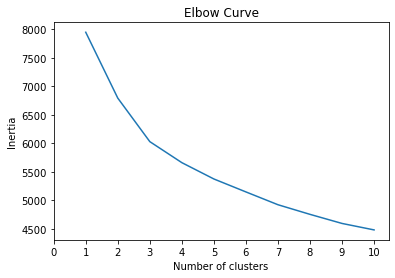

In [15]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


In [19]:
def get_clusters(k, df_myopia_pca):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(df_myopia_pca)

    # Predict clusters
    predictions = model.predict(df_myopia_pca)

    # Create return DataFrame with predicted clusters
    df_myopia_pca["myopic"] = model.labels_

    return df_myopia_pca

In [20]:
clusters = get_clusters(2, df_myopia_pca)
clusters.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,myopic
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


In [21]:
def show_clusters(df_myopia_pca):
    plt.scatter(df_myopia_pca['principal component 1'], df_myopia_pca['principal component 2'], 
                c=df_myopia_pca['myopic'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

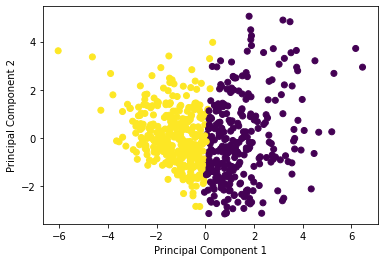

In [22]:
show_clusters(clusters)

Part 4

The sample data given was not conclusive enough to cluster the patients based on having myopia. If more dimensions were added, we may be able to cluster after more analysis. 
